In [1]:
from federation.plumbing.filesystem import ObservationalDirectoryAgent
from federation.xca.cnn import PlotCompanion
import xarray as xr
import numpy as np

In [2]:
model_path = "../saved_models/TiMgCu/"
data_path = "../saved_models/TiMgCu/exp_data"
eg_model_data = xr.open_dataset("../saved_models/TiMgCu/example_training.nc")
eg_exp_data = np.loadtxt("../saved_models/TiMgCu/exp_data/0.ioq")

# Extract linspace from examples
model_tth = eg_model_data.coords["2theta"].values
exp_tth = eg_exp_data[:,0]

In [3]:
# This could also trim the data to the ROI
# Data is automatically normalized onto (-1, 1) within the companion
def data_transform(data):
    return data

2021-07-18 09:29:34.175928: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


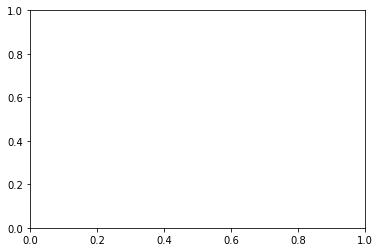

In [4]:
companion = PlotCompanion(model_path=model_path,
                          model_tth=model_tth, # Model linspace
                          exp_tth=exp_tth, # Experiment linspace
                          coordinate_transform=None, # Converting between science space coordinates and beamline space,
                          categorical=True # Classification (True) or Regression (False)
                          )


agent = ObservationalDirectoryAgent(companion,
                                    data_path,
                                    path_spec="*.ioq",
                                    data_transform=data_transform)

In [5]:
agent.load_dir()

2021-07-18 09:30:00.053881: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


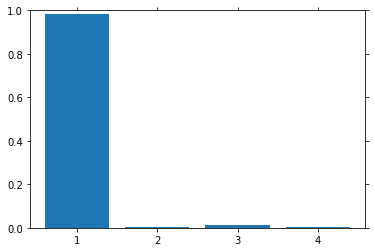

In [6]:
agent.companion.observe()